In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, roc_auc_score

import ROOT
from ROOT import TLorentzVector, TVector3

from eval_model import eval_model
from model import Model, Stack, Encoder

Welcome to JupyROOT 6.28/09


In [2]:
tag = "U_Test"

in_data_top = "WS_U_Test/datasets_top"
in_model_top = "WS_U_Test/training_top_nominal"

in_data_bottom = "WS_U_Test/datasets_bottom"
in_model_bottom = "WS_U_Test/training_bottom_nominal"

out_dir = "WS_U_Test/eval_1M"

analysis_type1 = "top"
analysis_type2 = "bottom"

In [3]:
def eval_plots(true_labels, predicted_labels, analysis_type):
    if analysis_type=="bottom":
        feats = ['bottom_px','bottom_py','bottom_pz']
        ranges = [(-1,1),(-1,1),(-1,1)]
    if analysis_type=="down":
        feats = ['down_px','down_py','down_pz']
        ranges = [(-1,1),(-1,1),(-1,1)]
    if analysis_type=="top":
        feats = ['top_px','top_py','top_pz','top_E']
        ranges = [(-1000,1000),(-1000,1000),(-1000,1000),(0,1500)]
    num_feats=len(feats)

    print("Plotting predictions...")
    for i in range(num_feats):
        plt.figure()
        plt.hist(np.ravel(true_labels[:,i]),histtype='step',color='r',label='True Distribution',bins=50,range=ranges[i])
        plt.hist(np.ravel(predicted_labels[:,i]),histtype='step',color='b',label='Predicted Distribution',bins=50,range=ranges[i])
        plt.title("Predicted Ouput Distribution using Attention Model")
        plt.legend()
        plt.yscale('log')
        plt.xlabel(feats[i],loc='right')
        #plt.savefig(out_dir+"/pred_1d_"+feats[i]+".png")
        #plt.show()
        plt.close()

        plt.figure()
        plt.title("Ouput Distribution using Attention Model")
        plt.hist2d(np.ravel(predicted_labels[:,i]),np.ravel(true_labels[:,i]), bins=100,norm=mcolors.LogNorm(),range=(ranges[i],ranges[i]))
        plt.xlabel('Predicted '+feats[i],loc='right')
        plt.ylabel('True '+feats[i],loc='top')
        diff = ranges[i][1] - ranges[i][0]
        plt.text(ranges[i][1]-0.3*diff,ranges[i][0]+0.2*diff,"$R^2$ value: "+str(round(r2_score(np.ravel(predicted_labels[:,i]),np.ravel(true_labels[:,i])),3)),backgroundcolor='r',color='k')
        #print("R^2 value: ", round(r2_score(predicted_labels[:,i],true_labels[:,i]),3))
        #plt.savefig(out_dir+"/pred_2d_"+feats[i]+".png")
        plt.show()
        plt.close()

    print("Done training!")

In [4]:
true_top, pred_top = eval_model(tag, in_data_top, in_model_top, out_dir, analysis_type1)

Testing Batches:  2259
GPU Available:  True
cuda:0

Test Loss:	 355738.0

Test MAE:	 38.365535684672366
Test RMSE:	 56.97226766223012


Plotting predictions...


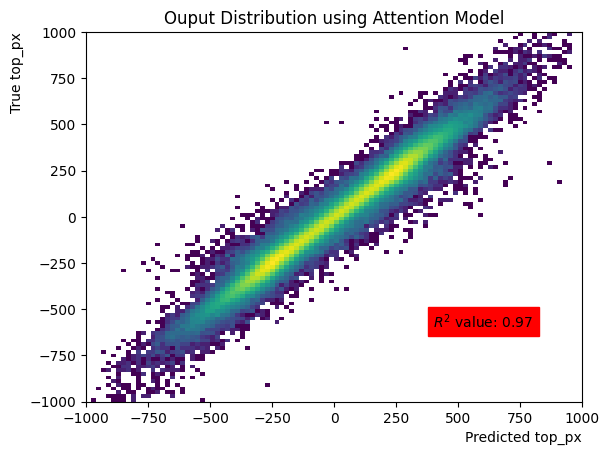

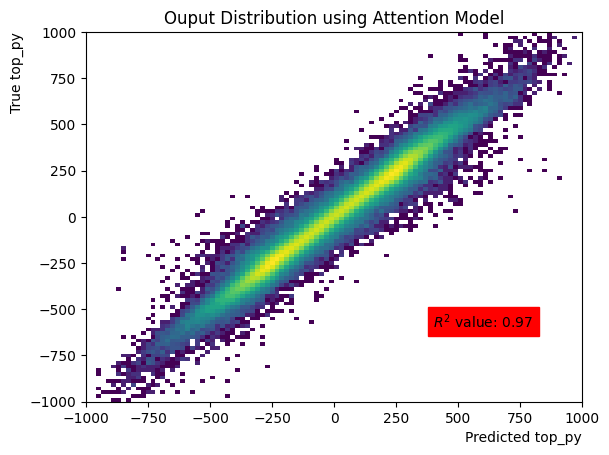

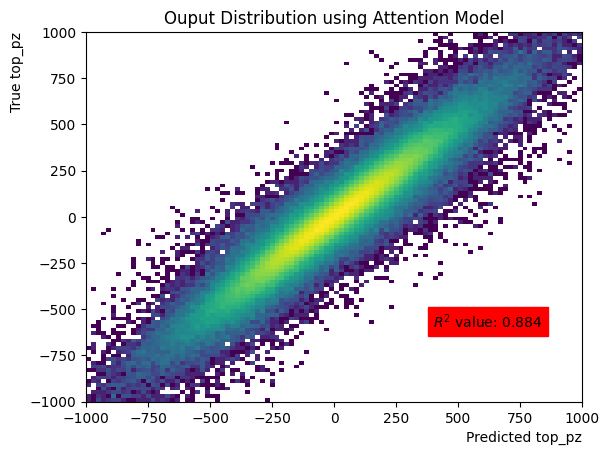

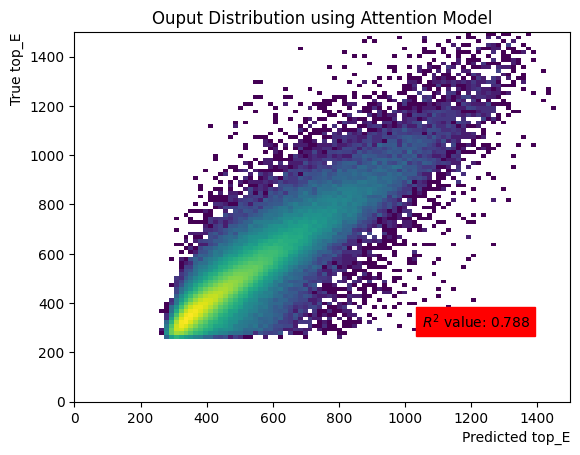

Done training!


In [5]:
eval_plots(true_top, pred_top, analysis_type1)

In [6]:
true_bottom, pred_bottom = eval_model(tag, in_data_bottom, in_model_bottom, out_dir, analysis_type2)

Testing Batches:  2259
GPU Available:  True
cuda:0

Test Loss:	 75.78314

Test MAE:	 0.21945268060640824
Test RMSE:	 0.3107078646921984


Plotting predictions...


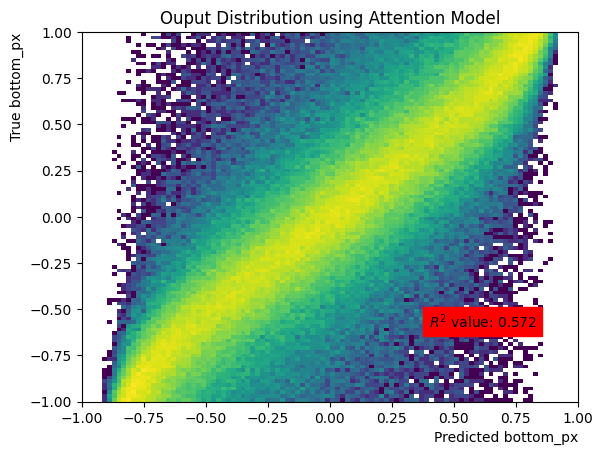

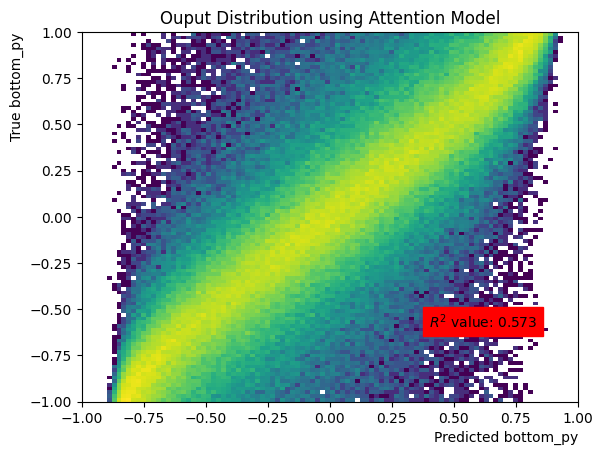

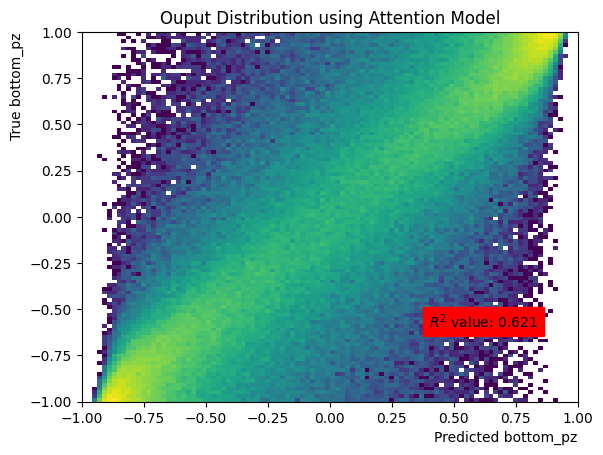

Done training!


In [7]:
eval_plots(true_bottom, pred_bottom, analysis_type2)

In [8]:
cos_theta_true=[]
cos_theta_pred=[]
events = len(true_top)
for event in range(events):
    vec_top_true = TLorentzVector(true_top[event,0],true_top[event,1],true_top[event,2],true_top[event,3])
    vec_top_pred = TLorentzVector(pred_top[event,0],pred_top[event,1],pred_top[event,2],pred_top[event,3])
    vec_bottom_true = TVector3(true_bottom[event,0],true_bottom[event,1],true_bottom[event,2])
    vec_bottom_pred = TVector3(pred_bottom[event,0],pred_bottom[event,1],pred_bottom[event,2])
    
    vec_top_true = vec_top_true.Vect().Unit()
    vec_top_pred = vec_top_pred.Vect().Unit()

    cos_theta_true.append(vec_top_true.Dot(vec_bottom_true))
    cos_theta_pred.append(vec_top_pred.Dot(vec_bottom_pred))

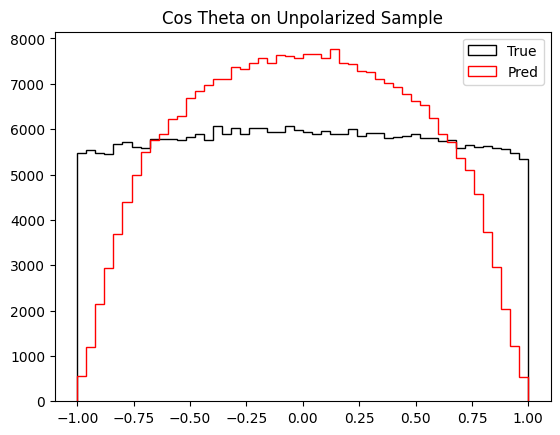

In [9]:
plt.title("Cos Theta on Unpolarized Sample")
plt.hist(cos_theta_true,histtype='step',bins=50,range=(-1,1),color='k',label='True')
plt.hist(cos_theta_pred,histtype='step',bins=50,range=(-1,1),color='r',label='Pred')
plt.legend()
plt.show()